# Welcome to this notebook!

In this notebook, I'll walk you through one of the easiest and most reliable ways to search for and download free images from the internet for your project without worrying about licensing issues.


### Key Points:

**Pexels API** is free and provides high-quality images, making it an excellent choice for downloading free images

**`download_url`** (from Fastai) is used to download the image from the provided URL.

**`Fastai`** is a powerful, high-level library built on top of **`PyTorch`** that simplifies **Deep Learning** and **Computer Vision** tasks.Fastai allows to quickly and easily apply state-of-the-art models to solve real-world problems - in this case, we'll use it to download and display images.



###**STEP 1: Get a Pexels API key**

You'll need a valid API key from Pexels. Go to [Pexels API](https://www.pexels.com/api/) and sign up for a free API key.

###**STEP 2: Install necessary libraries:**

   -  `requests` - a Python library thay allows to send HTTP requests easily - in this case to make API calls
   
   - `fastai` and `fastdownload` for downloading and displaying images
   



In [24]:
!pip install fastai fastdownload


In [1]:
import fastai

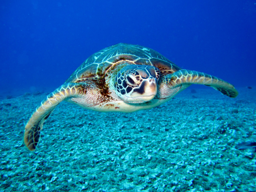

In [18]:
import requests
from fastai.vision.all import *
from fastdownload import download_url

# Replace YOUR_PEXELS_API_KEY with your actual Pexels API key
API_KEY = 'YOUR_PEXELS_API_KEY'

# Let's do search query
search_term = 'sea turtle'

# URL to access the Pexels API using an f-string to insert the search_term & per_page= number of images
url = f'https://api.pexels.com/v1/search?query={search_term}&per_page=1'

#Authorization header is required by the Pexels API to authenticate your request
headers = {
    'Authorization': API_KEY
}

# request to Pexels API
response = requests.get(url, headers=headers) #returns a response object
data = response.json() #converts JSON response from the API into a Python dict

# Get the 1st image from list of photos returned by the API
image_url = data['photos'][0]['src']['original'] # original-sized image is large

# Download image using download_url
download_url(image_url, 'turtle.jpg', show_progress=True)

# Open & visualize image
Image.open('turtle.jpg').to_thumb(256, 256) #this converts it into a smaller/thumbnail size (256x256 pixels)


# Different ways of Searching Internet for free images

There are several other ways to search the internet for free images, each with its own set of tools and APIs. Many platforms provide high-quality, royalty-free images that you can use in your projects.

### 2. **Unsplash API** (Free High-Quality Images)
Unsplash is another popular source for free, high-quality images. It also has an API that allows you to search for and download images.

#### Example with the Unsplash API:
First, sign up for an API key from [Unsplash](https://unsplash.com/developers).

```python
import requests

# Unsplash API key
API_KEY = 'your_api_key_here'

# Search term
query = 'bird'

# Unsplash API URL
url = f'https://api.unsplash.com/photos/random?query={query}&client_id={API_KEY}&count=1'

# Make a request to the Unsplash API
response = requests.get(url)
data = response.json()

# Get the image URL
image_url = data[0]['urls']['regular']

# Download the image
img_data = requests.get(image_url).content
with open('bird_unsplash.jpg', 'wb') as f:
    f.write(img_data)

# Show the image
from PIL import Image
im = Image.open('bird_unsplash.jpg')
im.show()
```

---

### 3. **Pixabay API** (Free Images & Videos)
Pixabay offers a large collection of free images, videos, and illustrations. You can access their images through their **API**.

#### Example with the Pixabay API:
Sign up for an API key from [Pixabay](https://pixabay.com/api/docs/).

```python
import requests

# Pixabay API key
API_KEY = 'your_api_key_here'

# Search term
query = 'bird'

# Pixabay API URL
url = f'https://pixabay.com/api/?key={API_KEY}&q={query}&image_type=photo&per_page=1'

# Make a request to the Pixabay API
response = requests.get(url)
data = response.json()

# Get the image URL
image_url = data['hits'][0]['largeImageURL']

# Download the image
img_data = requests.get(image_url).content
with open('bird_pixabay.jpg', 'wb') as f:
    f.write(img_data)

# Show the image
from PIL import Image
im = Image.open('bird_pixabay.jpg')
im.show()
```

---

### 4. **Google Custom Search API** (Free Image Search)
You can use **Google Custom Search JSON API** to search for free images across the web. However, Google limits the number of free requests per day, so it's best for small-scale usage.

#### Example with Google Custom Search API:
First, you'll need to set up a Google Custom Search Engine (CSE) and get your API key and CSE ID from [Google Custom Search API](https://developers.google.com/custom-search/v1/overview).

```python
import requests

# Your Google API key and Custom Search Engine ID
API_KEY = 'your_google_api_key'
CSE_ID = 'your_cse_id'

# Search term
query = 'bird'

# Google Custom Search URL
url = f'https://www.googleapis.com/customsearch/v1?q={query}&key={API_KEY}&cx={CSE_ID}&searchType=image'

# Make a request to the Google API
response = requests.get(url)
data = response.json()

# Get the first image URL
image_url = data['items'][0]['link']

# Download the image
img_data = requests.get(image_url).content
with open('bird_google.jpg', 'wb') as f:
    f.write(img_data)

# Show the image
from PIL import Image
im = Image.open('bird_google.jpg')
im.show()
```

---

### 5. **Openverse (Formerly CC Search)**
Openverse provides access to free and openly licensed images, audio, and other media. It allows you to search for content under Creative Commons licenses.

You can use Openverse's **API** to search for images with appropriate licenses.

#### Example with Openverse API:
Openverse provides an API that doesn't require an API key. You can use it directly to search for images.

```python
import requests

# Search term
query = 'bird'

# Openverse API URL
url = f'https://api.openverse.engineering/v1/images/?q={query}'

# Make a request to the Openverse API
response = requests.get(url)
data = response.json()

# Get the first image URL
image_url = data['results'][0]['url']

# Download the image
img_data = requests.get(image_url).content
with open('bird_openverse.jpg', 'wb') as f:
    f.write(img_data)

# Show the image
from PIL import Image
im = Image.open('bird_openverse.jpg')
im.show()
```



---

### Summary of Image Search APIs:
1. **Pexels API** – Free, high-quality images, good for general use.
2. **Unsplash API** – Stunning, high-quality photography.
3. **Pixabay API** – Free images and videos with broad content.
4. **Google Custom Search API** – Search for images across the web (with some limitations).
5. **Openverse API** – Openly licensed, free-to-use images.

Each of these APIs is an excellent option for finding free, high-quality images, and they all support programmatic image retrieval for your projects. Depending on your specific needs, any of these could work well for image searching.

Let me know if you'd like more details on any of these options!